# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"

lat1 = []
lon1 = []
temp1_max = []
humidity1 = []
cloudity1 = []
wind_speed1 = []
country1 = []
date1 = []
city1 = []

print ('Beginning Data Retrieval')     
print ('-----------------------------')

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        temp_max = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudity = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
    
        city1.append(city)
        lat1.append(lat)
        lon1.append(lon)
        temp1_max.append(temp_max)
        humidity1.append(humidity)
        cloudity1.append(cloudity)
        wind_speed1.append(wind_speed)
        country1.append(country)
        date1.append(date)
    
        print(f"{city}found!")
    
        time.sleep(1)
    
    except:
        print('City not found. Skipping...')

print ( "-----------------------------")
print ("Data Retrieval Complete")      
print ("-----------------------------")  



# Processing Record 1 of Set 1 | butaritari


Beginning Data Retrieval
-----------------------------
surfound!
blufffound!
albanyfound!
severo-kurilskfound!
ust-tsilmafound!
taoudennifound!
port alfredfound!
ushuaiafound!
mataurafound!
hobartfound!
yellowknifefound!
vaitapefound!
san quintinfound!
pevekfound!
lakes entrancefound!
cape townfound!
nikolskoyefound!
gornopravdinskfound!
carutaperafound!
miandrivazofound!
jamestownfound!
punta arenasfound!
busseltonfound!
castrofound!
esperancefound!
City not found. Skipping...
rypefjordfound!
ancudfound!
daweifound!
farefound!
alto araguaiafound!
sicuanifound!
City not found. Skipping...
margatefound!
wukarifound!
kumbafound!
san patriciofound!
ledyardfound!
olindafound!
City not found. Skipping...
roebournefound!
banda acehfound!
viedmafound!
barrowfound!
roaldfound!
City not found. Skipping...
butaritarifound!
east londonfound!
chokurdakhfound!
beidaofound!
cockburn townfound!
kapaafound!
vilafound!
City not found. Skipping...
muscatinefound!
bandrelefound!
korlafound!
latafound!
Ci

qaqortoqfound!
burniefound!
antofagastafound!
vorotynetsfound!
austintownfound!
najranfound!
kuytunfound!
road townfound!
nazefound!
yaradafound!
lagoafound!
puerto colombiafound!
chernyshevskiyfound!
rawsonfound!
vardofound!
quelimanefound!
City not found. Skipping...
City not found. Skipping...
byron bayfound!
City not found. Skipping...
redcliffefound!
kloulklubedfound!
vypolzovofound!
ranibennurfound!
goundamfound!
baruun-urtfound!
zaysanfound!
witufound!
sioux lookoutfound!
yanamfound!
kabindafound!
City not found. Skipping...
victoria pointfound!
gnjilanefound!
tiznitfound!
sistrandafound!
lompocfound!
kincardinefound!
chervonefound!
tateyamafound!
masvingofound!
duminichifound!
orlikfound!
uruzganfound!
tagusaofound!
honiarafound!
tigilfound!
misratahfound!
intafound!
port hardyfound!
milkovofound!
saint-estevefound!
City not found. Skipping...
lagunasfound!
digbyfound!
salinopolisfound!
jumlafound!
glebychevofound!
sabana de torresfound!
slave lakefound!
nueva lojafound!
mapiri

In [4]:
weather_df = pd.DataFrame(
{"City": city1,
 "Lat": lat1,
 "Lng": lon1,
 "Max Temp": temp1_max,
 "Humidity": humidity1,
 "Cloudiness": cloudity1,
 "Wind Speed": wind_speed1,
 "Country": country1,
 "Date": date1})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,292.96,62,0,0.43,OM,1613063110
1,bluff,-46.6000,168.3333,284.04,80,59,6.32,NZ,1613063111
2,albany,42.6001,-73.9662,270.93,49,88,3.96,US,1613062815
3,severo-kurilsk,50.6789,156.1250,271.60,91,100,7.69,RU,1613063113
4,ust-tsilma,65.4410,52.1498,249.23,90,83,1.11,RU,1613063114
...,...,...,...,...,...,...,...,...,...
551,quatre cocos,-20.2078,57.7625,300.15,69,40,5.14,MU,1613063761
552,resavica,44.0408,21.5816,270.37,67,100,8.30,RS,1613063762
553,ballina,-28.8667,153.5667,292.15,88,75,1.29,AU,1613063763
554,berlevag,70.8578,29.0864,268.15,68,0,6.69,NO,1613063764


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.to_csv('cities.csv', encoding='utf-8')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,292.96,62,0,0.43,OM,1613063110
1,bluff,-46.6000,168.3333,284.04,80,59,6.32,NZ,1613063111
2,albany,42.6001,-73.9662,270.93,49,88,3.96,US,1613062815
3,severo-kurilsk,50.6789,156.1250,271.60,91,100,7.69,RU,1613063113
4,ust-tsilma,65.4410,52.1498,249.23,90,83,1.11,RU,1613063114


In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.00000,5.560000e+02
mean,20.590462,17.665258,282.424173,72.339928,53.392086,3.77786,1.613063e+09
std,33.703924,91.660329,19.087145,19.797113,38.927387,2.85640,2.138996e+02
min,-54.800000,-179.166700,230.150000,8.000000,0.000000,0.08000,1.613063e+09
25%,-8.652100,-66.932375,269.150000,63.000000,9.000000,1.55750,1.613063e+09
50%,25.238650,24.696800,289.150000,76.000000,69.000000,3.09000,1.613063e+09
75%,48.674975,95.519150,298.227500,87.000000,90.000000,5.14000,1.613064e+09
max,78.218600,179.316700,309.700000,100.000000,100.000000,18.01000,1.613064e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_100_df = weather_df.loc[weather_df["Humidity"] > 100, :]
humidity_100_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace=False)
clean_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,292.96,62,0,0.43,OM,1613063110
1,bluff,-46.6000,168.3333,284.04,80,59,6.32,NZ,1613063111
2,albany,42.6001,-73.9662,270.93,49,88,3.96,US,1613062815
3,severo-kurilsk,50.6789,156.1250,271.60,91,100,7.69,RU,1613063113
4,ust-tsilma,65.4410,52.1498,249.23,90,83,1.11,RU,1613063114
...,...,...,...,...,...,...,...,...,...
551,quatre cocos,-20.2078,57.7625,300.15,69,40,5.14,MU,1613063761
552,resavica,44.0408,21.5816,270.37,67,100,8.30,RS,1613063762
553,ballina,-28.8667,153.5667,292.15,88,75,1.29,AU,1613063763
554,berlevag,70.8578,29.0864,268.15,68,0,6.69,NO,1613063764


In [9]:
clean_weather_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.00000,5.560000e+02
mean,20.590462,17.665258,282.424173,72.339928,53.392086,3.77786,1.613063e+09
std,33.703924,91.660329,19.087145,19.797113,38.927387,2.85640,2.138996e+02
min,-54.800000,-179.166700,230.150000,8.000000,0.000000,0.08000,1.613063e+09
25%,-8.652100,-66.932375,269.150000,63.000000,9.000000,1.55750,1.613063e+09
50%,25.238650,24.696800,289.150000,76.000000,69.000000,3.09000,1.613063e+09
75%,48.674975,95.519150,298.227500,87.000000,90.000000,5.14000,1.613064e+09
max,78.218600,179.316700,309.700000,100.000000,100.000000,18.01000,1.613064e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

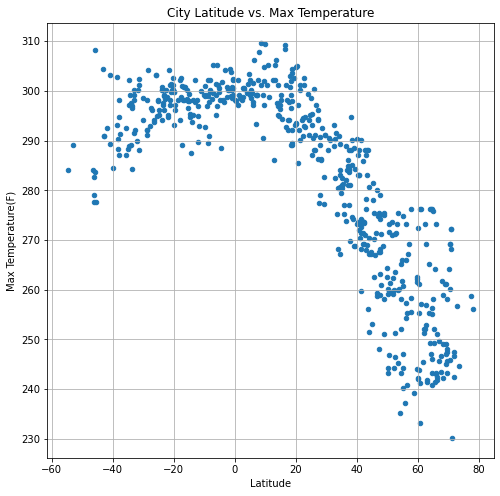

In [10]:
latitude_and_temperature = clean_weather_df[['Lat', 'Max Temp']]
latitude_and_temperature
latitude_and_temperature.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Humidity Plot

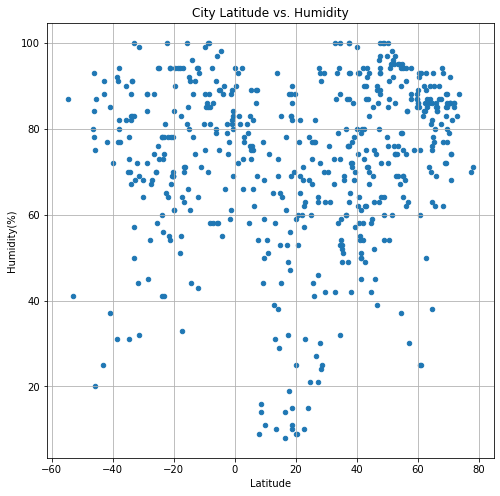

In [11]:
latitude_and_humidity = clean_weather_df[['Lat', 'Humidity']]
latitude_and_humidity
latitude_and_humidity.plot(kind = "scatter", x = "Lat", y = "Humidity", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

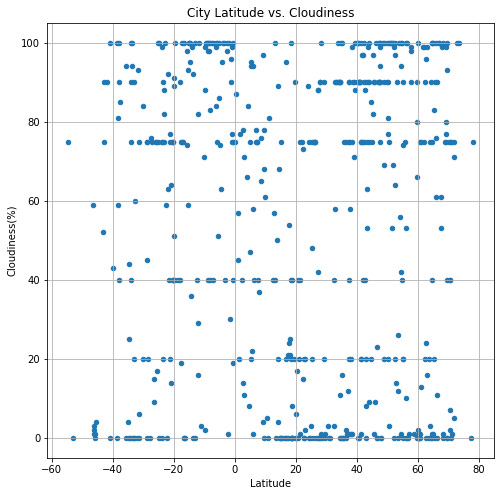

In [12]:
latitude_and_cloudiness = clean_weather_df[['Lat', 'Cloudiness']]
latitude_and_cloudiness
latitude_and_cloudiness.plot(kind = "scatter", x = "Lat", y = "Cloudiness", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

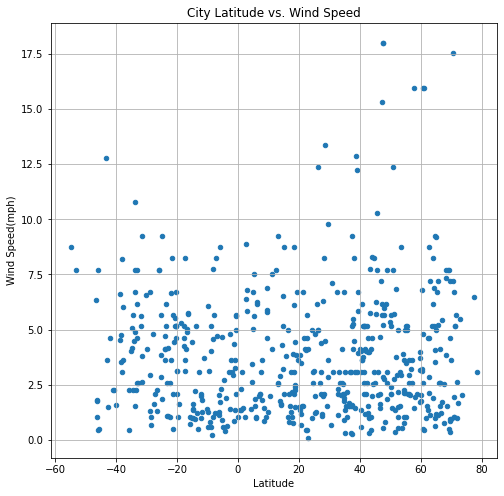

In [13]:
latitude_and_wind_speed = clean_weather_df[['Lat', 'Wind Speed']]
latitude_and_wind_speed
latitude_and_wind_speed.plot(kind = "scatter", x = "Lat", y = "Wind Speed", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.show()

## Linear Regression

In [17]:
northern_hemisphere = clean_weather_df.loc[clean_weather_df['Lat'] > 0, :]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,292.96,62,0,0.43,OM,1613063110
2,albany,42.6001,-73.9662,270.93,49,88,3.96,US,1613062815
3,severo-kurilsk,50.6789,156.1250,271.60,91,100,7.69,RU,1613063113
4,ust-tsilma,65.4410,52.1498,249.23,90,83,1.11,RU,1613063114
5,taoudenni,22.6783,-3.9836,302.67,10,0,5.66,ML,1613063115
...,...,...,...,...,...,...,...,...,...
549,saint-gaudens,43.0833,0.6667,287.15,62,90,1.03,FR,1613063759
550,onega,63.9061,38.1404,249.36,90,3,1.88,RU,1613063760
552,resavica,44.0408,21.5816,270.37,67,100,8.30,RS,1613063762
554,berlevag,70.8578,29.0864,268.15,68,0,6.69,NO,1613063764


In [18]:
southern_hemisphere = clean_weather_df.loc[clean_weather_df['Lat'] < 0, :]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bluff,-46.6000,168.3333,284.04,80,59,6.32,NZ,1613063111
6,port alfred,-33.5906,26.8910,296.48,91,94,2.24,ZA,1613063117
7,ushuaia,-54.8000,-68.3000,284.15,87,75,8.75,AR,1613063118
8,mataura,-46.1927,168.8643,277.61,93,3,1.03,NZ,1613063119
9,hobart,-42.8794,147.3294,290.93,88,75,3.60,AU,1613062965
...,...,...,...,...,...,...,...,...,...
543,isangel,-19.5500,169.2667,296.15,94,40,1.03,VU,1613063752
545,bambous virieux,-20.3428,57.7575,300.15,69,40,5.14,MU,1613063754
548,vredendal,-31.6683,18.5012,300.26,44,93,5.60,ZA,1613063757
551,quatre cocos,-20.2078,57.7625,300.15,69,40,5.14,MU,1613063761


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.876555457735292


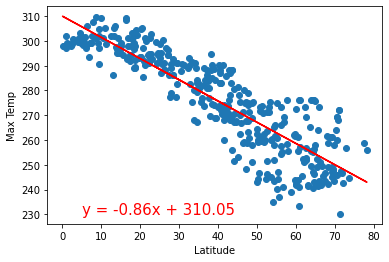

In [21]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,230),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5101246028324602


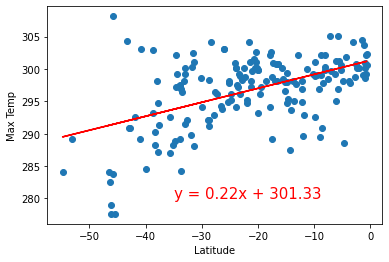

In [23]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,280),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression